In [46]:
from io import BytesIO

from IPython.core import display
from PIL import Image

# Installed apps
from PyPDF2 import PdfFileReader
from sorl.thumbnail import ImageField
from wand.image import Image as WandImage
from wand.color import Color
import os.path
# Project apps

def display_pil_image(im):
   """Displayhook function for PIL Images, rendered as PNG."""

   b = BytesIO()
   im.save(b, format='png')
   data = b.getvalue()

   ip_img = display.Image(data=data, format='png', embed=True)
   return ip_img._repr_png_()


# register display func with PNG formatter:
png_formatter = get_ipython().display_formatter.formatters['image/png']
dpi = png_formatter.for_type(Image.Image, display_pil_image)

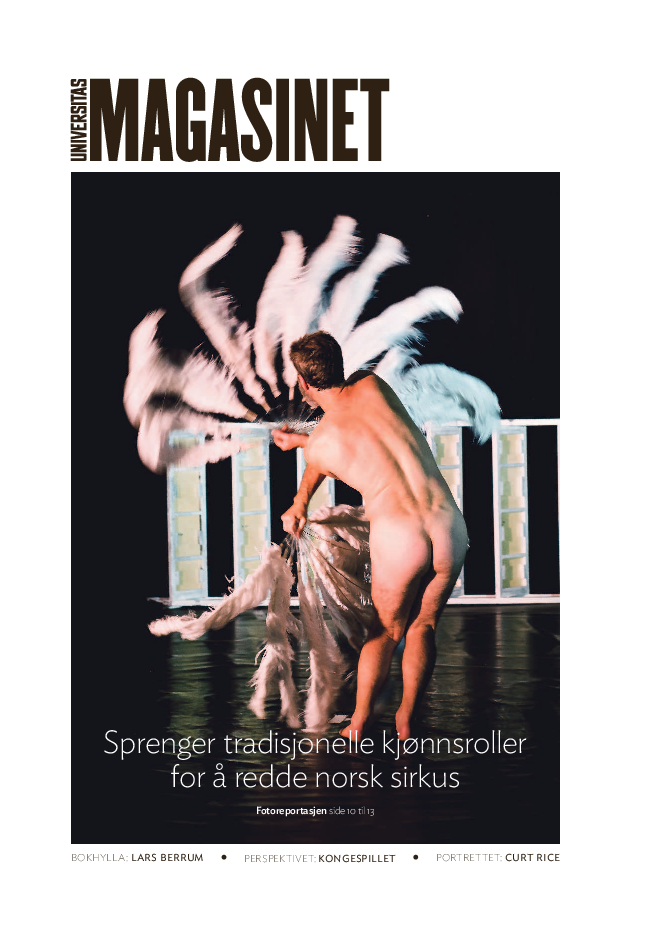

In [47]:
from IPython.display import Image
from wand.exceptions import BlobError
from wand.drawing import Drawing
from PyPDF2 import PdfFileWriter, PdfFileReader
from io import BytesIO
from wand.image import Image as WandImage
from wand.color import Color

def pdf_not_found(pdf_name):
    """Creates an error frontpage"""
    img = WandImage(
        width=300,
        height=500,
    )
    msg = 'ERROR:\n{}\nnot found on disk'.format(pdf_name)
    with Drawing() as draw:
        #draw.font = 'wandtests/assets/League_Gothic.otf'
        #draw.font_size = 40
        draw.text_alignment = 'center'
        draw.text(img.width // 2, img.height // 3, msg)
        draw(img)
    return img


def cover_as_image(self):
    
    def pdf_frontpage_to_image():
        reader = PdfFileReader(self.pdf.file)
        writer = PdfFileWriter()
        writer.addPage(reader.getPage(0))
        outputStream = BytesIO()
        writer.write(outputStream)
        outputStream.seek(0)
        img = WandImage(blob=outputStream, format='pdf', resolution=60)
        return img
    
    def pdf_not_found():
        """Creates an error frontpage"""
        img = WandImage(            width=400,            height=600,                       )
        msg = 'ERROR:\n{}\nnot found on disk'.format(self.pdf.name)
        with Drawing() as draw:
            #draw.font = 'wandtests/assets/League_Gothic.otf'
            #draw.font_size = 40
            draw.text_alignment='center'
            draw.text(img.width // 2, img.height // 3, msg)
            draw(img)
        return img
   
    try:
        return pdf_frontpage_to_image()
    except Exception as e:
        raise

def create_thumbnail(self):
    """ Create a jpg version of the pdf frontpage """
    filename = self.pdf.name.replace('.pdf', '.jpg'
                    ).replace('pdf/', 'pdf/covers/')

    cover = self.cover_as_image()
    width, height = cover.width, cover.height
    
    background = WandImage(
        width=width,
        height=height,
        background=Color('white'))
    background.format = 'jpeg'
    background.composite(foreground, 0, 0)

    blob = BytesIO()
    background.save(blob)
    imagefile = ContentFile(blob.getvalue())

    self.cover_page.save(filename, imagefile, save=True)


    
def show_thumbnail(self):
    cover_page = '/tmp/wand_img.png'
    pdf_name = self.pdf.name
    img = cover_as_image(self)
    bg = WandImage(
        width=img.width,
        height=img.height,
        background=Color('white'))
    bg.composite(img, 0, 0)
    bg.save(filename=cover_page)
    return bg

    #return Image(filename=cover_page)

    
#goodimg = show_thumbnail(PrintIssue.objects.first())
badimg = show_thumbnail(PrintIssue.objects.last())
badimg

In [ ]:
from ctypes import c_void_p, c_int
from wand.api import library
library.MagickTransformImageColorspace.argtypes = [c_void_p, c_int]

library.MagickTransformImageColorspace(badimg.wand, 6)
badimg

In [39]:
pdf=PrintIssue.objects.last().pdf
fil = pdf.file



In [44]:
reader = PdfFileReader(self.pdf.file)
writer = PdfFileWriter()
writer.addPage(reader.getPage(0))
outputStream = BytesIO()
writer.write(outputStream)
outputStream.seek(0)
img = WandImage(blob=outputStream, format='pdf', resolution=60)
#writer
#outputStream = open('/tmp/forside.pdf', "wb")
#outputStream = BytesIO()
#writer.write(outputStream)


AttributeError: type object 'PdfFileWriter' has no attribute 'cloneReaderDocumentRoot'

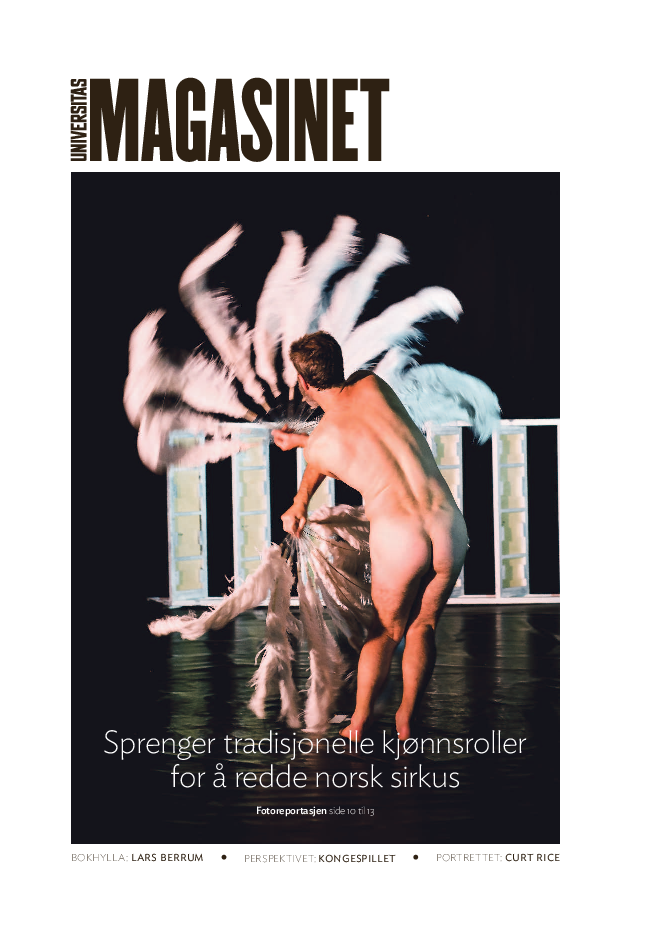

In [42]:
img

In [64]:
local_path='/srv/fotoarkiv_universitas/'
photos = ImageFile.objects.filter(source_file__startswith=local_path)
for photo in photos:
    photo.source_file.name = photo.source_file.name.replace(local_path, '')
    photo.save()

In [54]:
photos.count()

199